# Pre-class work

To test your DoWhy knowledge, make a fake dataset that follows Figure 3.12 from the textbook, and try to follow the tutorials to estimate the effect. Write down any complications you had along the way.


Screenshot of instructions:

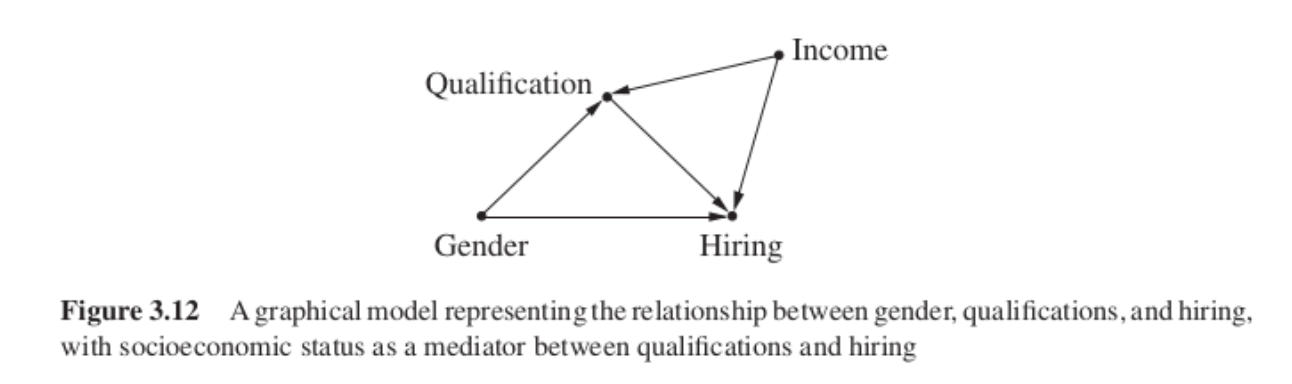

In [63]:
#Generate the dataset
data = dowhy.datasets.linear_dataset(beta=10,
        num_treatments=1,
        num_effect_modifiers=3,
        num_common_causes=2,
        num_samples=10000,
        treatment_is_binary=False,
        outcome_is_binary=True,
        num_discrete_common_causes=1)
df = data["df"]
df.columns = ["a", "b", "c", "income", "gender", "qualifications", "hiring"]
print(df.head())

          a         b         c    income gender  qualifications  hiring
0 -1.215789  0.256917  0.196923  1.639790      3        5.091212    True
1  0.563007  0.094059  1.414593  1.782303      1        1.804578    True
2 -0.612460  1.189966 -0.997732  0.925798      3        2.732080    True
3 -2.445635  0.656916 -0.586731  0.008801      1        1.003152    True
4 -1.293865  1.500676 -1.429592  0.118370      0       -0.467263   False


INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['qualifications'] on outcome ['hiring']
INFO:dowhy.causal_graph:Using Matplotlib for plotting


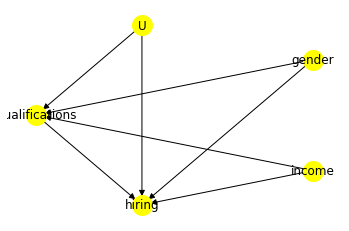

In [64]:
#Define the model
model= CausalModel(
        data=df, 
        treatment="qualifications",
        outcome="hiring",
        common_causes=["income", "gender"]
        )
model.view_model(layout="dot")

In [54]:
#Identify the effect
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['gender', 'U', 'income']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] n


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                           
─────────────────(Expectation(hiring|gender,income))
d[qualifications]                                   
Estimand assumption 1, Unconfoundedness: If U→{qualifications} and U→hiring then P(hiring|qualifications,gender,income,U) = P(hiring|qualifications,gender,income)
### Estimand : 2
Estimand name: iv
No such variable found!



In [57]:
#Estimate the effect
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: hiring~qualifications+gender+income


                            OLS Regression Results                            
Dep. Variable:                 hiring   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     2417.
Date:                Tue, 13 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:14:46   Log-Likelihood:                -1877.0
No. Observations:               10000   AIC:                             3766.
Df Residuals:                    9994   BIC:                             3809.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4843      0.006     82.850      0.0

In [59]:
#Refutation
res_random=model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause")
print(res_random)

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: hiring~qualifications+gender+income+w_random


                            OLS Regression Results                            
Dep. Variable:                 hiring   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     2015.
Date:                Tue, 13 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:24:40   Log-Likelihood:                -1876.5
No. Observations:               10000   AIC:                             3767.
Df Residuals:                    9993   BIC:                             3817.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4841      0.006     82.792      0.0

In [14]:
rvar = 1 if np.random.uniform() > 0.5 else 0
data_dict = dowhy.datasets.xy_dataset(10000, effect=rvar, sd_error=0.2)
df = data_dict['df']
print(df[["Treatment", "Outcome", "w0"]].head())

   Treatment    Outcome        w0
0   3.002887   6.160348 -2.913490
1   5.037014  10.447214 -0.918894
2   3.640433   7.500967 -2.292709
3   9.168346  18.936162  3.296239
4   5.067586  10.094588 -1.046667


In [14]:
rvar = 1 if np.random.uniform() > 0.5 else 0
data_dict = dowhy.datasets.xy_dataset(10000, effect=rvar, sd_error=0.2)
df = data_dict['df']
print(df[["Treatment", "Outcome", "w0"]].head())

   Treatment    Outcome        w0
0   3.002887   6.160348 -2.913490
1   5.037014  10.447214 -0.918894
2   3.640433   7.500967 -2.292709
3   9.168346  18.936162  3.296239
4   5.067586  10.094588 -1.046667


# Working Example from documentation
source: https://microsoft.github.io/dowhy/example_notebooks/dowhy_simple_example.html

In [1]:
import numpy as np
import pandas as pd

import dowhy
from dowhy import CausalModel
import dowhy.datasets

In [2]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=10000,
        treatment_is_binary=True,
        num_discrete_common_causes=1)
df = data["df"]
print(df.head())
print(data["dot_graph"])
print("\n")
print(data["gml_graph"])

         X0   Z0        Z1        W0        W1        W2        W3 W4     v0  \
0 -0.318995  1.0  0.356351 -0.195263  0.206945  0.002902 -1.716416  2   True   
1  0.536721  0.0  0.883357 -0.428329  0.871704 -0.890518 -0.059079  0   True   
2 -0.750142  0.0  0.081938 -2.849726 -1.130610 -0.195260 -2.556350  0  False   
3  0.298991  0.0  0.758221  0.479357  1.531694 -0.626088 -1.500334  1   True   
4 -0.749077  1.0  0.397358  1.123549 -0.961780  0.500645 -0.266561  2   True   

           y  
0  10.289140  
1   8.310082  
2 -18.281320  
3  11.217092  
4  16.259964  
digraph { U[label="Unobserved Confounders"]; U->y;v0->y; U->v0;W0-> v0; W1-> v0; W2-> v0; W3-> v0; W4-> v0;Z0-> v0; Z1-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;X0-> y;}


graph[directed 1node[ id "y" label "y"]node[ id "Unobserved Confounders" label "Unobserved Confounders"]edge[source "Unobserved Confounders" target "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"]

In [3]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']


INFO:dowhy.causal_graph:Using Matplotlib for plotting


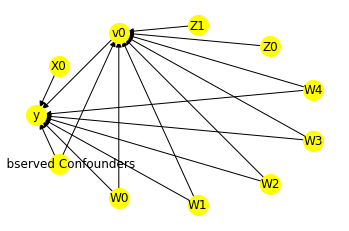

In [4]:
model.view_model()


In [5]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['W3', 'W2', 'W0', 'W1', 'Unobserved Confounders', 'W4']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['Z0', 'Z1']


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W3,W2,W0,W1,W4))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W2,W0,W1,W4,U) = P(y|v0,W3,W2,W0,W1,W4)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z0, Z1])*Derivative([v0], [Z0, Z1])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)



In [6]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W3+W2+W0+W1+W4


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W3,W2,W0,W1,W4))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W2,W0,W1,W4,U) = P(y|v0,W3,W2,W0,W1,W4)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z0, Z1])*Derivative([v0], [Z0, Z1])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)

## Realized estimand
b: y~v0+W3+W2+W0+W1+W4
Target units: ate

## Estimate
Mean value: 8.412530035269885

Causal Estimate is 8.412530035269885


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [7]:
# Causal effect on the control group (ATC)
causal_estimate_att = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification",
        target_units = "atc")
print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W3+W2+W0+W1+W4


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W3,W2,W0,W1,W4))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W2,W0,W1,W4,U) = P(y|v0,W3,W2,W0,W1,W4)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z0, Z1])*Derivative([v0], [Z0, Z1])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)

## Realized estimand
b: y~v0+W3+W2+W0+W1+W4
Target units: atc

## Estimate
Mean value: 8.253029750064167

Causal Estimate is 8.253029750064167


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Interface 2: Specify common causes and instruments


In [8]:

# Without graph
model= CausalModel(
        data=df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        common_causes=data["common_causes_names"],
        effect_modifiers=data["effect_modifier_names"])

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']


INFO:dowhy.causal_graph:Using Matplotlib for plotting


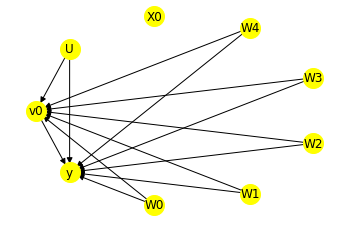

In [9]:
model.view_model()


In [10]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)


INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['W3', 'W2', 'W0', 'W1', 'U', 'W4']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


In [11]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_stratification")
print(estimate)
print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W3+W2+W0+W1+W4


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W3,W2,W0,W1,W4))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W2,W0,W1,W4,U) = P(y|v0,W3,W2,W0,W1,W4)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: y~v0+W3+W2+W0+W1+W4
Target units: ate

## Estimate
Mean value: 8.412530035269885

Causal Estimate is 8.412530035269885


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Refuting the estimate


In [12]:
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W3+W2+W0+W1+W4+w_random


Refute: Add a Random Common Cause
Estimated effect:8.412530035269885
New effect:8.430012383759752



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [13]:
res_unobserved=model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
print(res_unobserved)

ValueError: cannot set using a multi-index selection indexer with a different length than the value